# Multivariate Time Series Forecasting with V.A.R. 

/var/folders/xm/_6m30k1j1kbgb2ps1nz6t4d00000gn/T/ipykernel_4720/2155869638.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.asfreq('D').fillna(method='ffill')


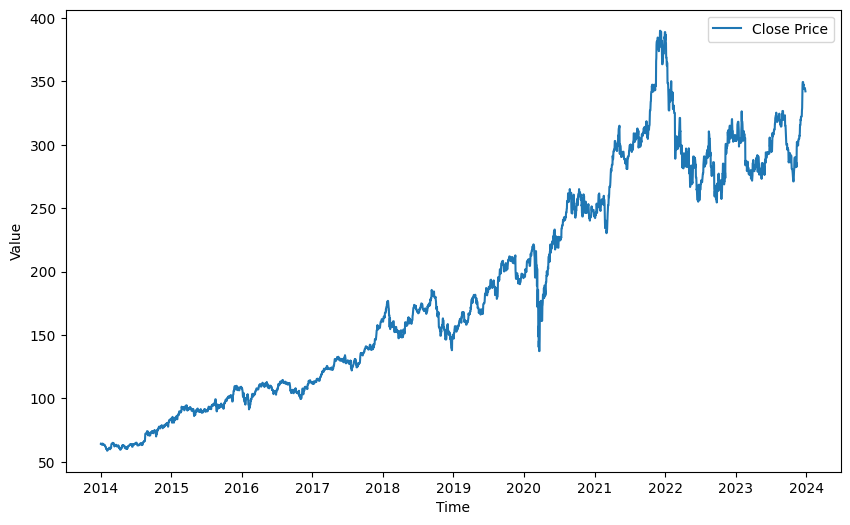

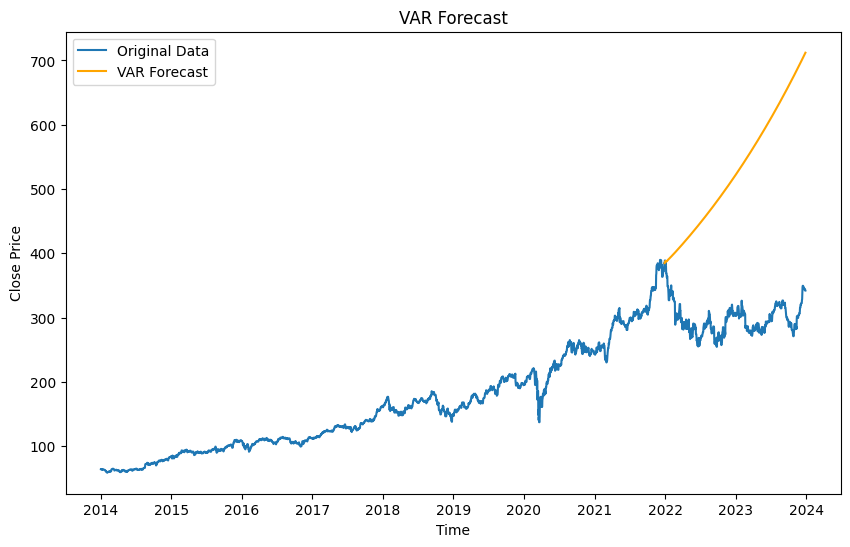

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

# Setting starting and ending dates
start_date = '2014-01-01'
end_date = '2024-01-01'

# Collecting historical stock market data for Home Depot Inc (ticker symbol "HD")
ticker = yf.Ticker("HD")
data = ticker.history(start=start_date, end=end_date)

# Filling missing values
data = data.asfreq('D').fillna(method='ffill')

# Selecting relevant columns
data = data[['Close', 'High', 'Low', 'Open', 'Volume']]

# Scaling the data for VAR model
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, index=data.index, columns=data.columns)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Train-test splitting
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Fitting VAR modelling
model_var = VAR(train_data)
model_var_fit = model_var.fit(maxlags=15, ic='aic')  # Choose lag based on AIC

# Forecasting
forecast_var = model_var_fit.forecast(train_data.values[-model_var_fit.k_ar:], steps=len(test_data))

# Converting forecast to DataFrame
forecast_var_df = pd.DataFrame(forecast_var, index=test_data.index, columns=test_data.columns)

# Inverse transform the forecast to original scale
forecast_var_scaled = scaler.inverse_transform(forecast_var_df)
forecast_var_scaled_df = pd.DataFrame(forecast_var_scaled, index=test_data.index, columns=test_data.columns)

# Plotting VAR forecasting
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Original Data')
plt.plot(test_data.index, forecast_var_scaled_df['Close'], 'orange', label='VAR Forecast')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.title('VAR Forecast')
plt.show()
